In [ ]:
"""
Author: Aditya Goel 400414715, MEST'21, McMaster University
SEP788/789: Neural Network and Development Tools
Assignment 3
References: 
1. Dataset = https://www.kaggle.com/mczielinski/bitcoin-historical-data
2. Dr. Hamidreza Mahyar's Lecture Notes
3. https://machinelearningmastery.com/gentle-introduction-long-short-term-memory-networks-experts/
4. Youtube Channels: https://www.youtube.com/watch?v=UbvkhuqVqUI&t=926s&ab_channel=KrishNaik
"""

"\nAuthor: Aditya Goel 400414715, MEST'21, McMaster University\nSEP788/789: Neural Network and Development Tools\nAssignment 3\nReferences: \n1. Dataset = https://www.kaggle.com/mczielinski/bitcoin-historical-data\n2. Dr. Hamidreza Mahyar's Lecture Notes\n3. https://machinelearningmastery.com/gentle-introduction-long-short-term-memory-networks-experts/\n4. Youtube Channels: https://www.youtube.com/watch?v=UbvkhuqVqUI&t=926s&ab_channel=KrishNaik, \n4.   \n"

In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# **Load and clean Dataset**

In [ ]:
def load_clean_dataset():
  dataset = pd.read_csv('./Original_Bitcoin_Dataset.csv')
  print("Original dimension of the Close-price column is", dataset['Close'].shape)

  dataset = dataset.loc[dataset['Close'] > 0]                                   #Remove NaN Values
  dataset = dataset.reset_index()                                               #Resets the row-number after the deletion of multiple rows
  print("New dimension after removing NaN values is", dataset['Close'].shape)
  return dataset

# **Convert timestamp to Date format**

In [ ]:
def timestamp_to_date(dataset):
  dataset['Timestamp']= pd.to_datetime(dataset['Timestamp'], unit='s')          #Convert timestamp to date
  print('Dataset with replaced timstamp column looks like:')
  print(dataset[['Timestamp','Close']])
  return dataset

# **Plot Close-price vs Date**

In [ ]:
def plot(dataset):
  plt.figure(figsize=(20,5))
  plt.xlabel('Date')                                                         
  plt.ylabel('Close price')
  plt.plot(dataset['Timestamp'], dataset['Close'])
  print("Plot of Close-Price vs Date looks like:")
  plt.show()

# **Preprocess the Data**

In [ ]:
def normalise(dataset):
  close_mean = np.mean(dataset['Close'])                                        
  close_sd = np.std(dataset['Close'])
  dataset['Close'] = (dataset['Close'] - close_mean) / close_sd                 #Standardize values with 0 mean and 1 variance
  return dataset

# **Split into train and test**

In [ ]:
def split_train_test(dataset):
  train, test = train_test_split(dataset['Close'], test_size=0.1, shuffle=False)    #in-biult sklearn method to split data into train and test with shuffle = False
  test = test.reset_index()                                                         #reset index of test data    
  test = test['Close']                                                              #remove additional index coloumn
  print('The shape of Training Data is: ', train.shape)
  print('The shape of Testing Data is: ', test.shape)
  print(test)
  return train, test

# **Data Preparation**

In [ ]:
def prepare_data(data, type):																										#Prepare data as Time-series inputs v/s Next close price
	X, y = [],[]
	for i in range(len(data)):
		last_day = i + 7																														#Taking data of 7 previous days
		if last_day > len(data)-1:																									#For last value
			break
		prev_data, next_price = data[i:last_day], data[last_day]										
		X.append(prev_data)																													#Create Input set
		y.append(next_price)																												#Create corresponding Output set
	if type == 'train':
		print('X_train shape is:', np.array(X).shape)                                        
		print('y_train shape is:', np.array(y).shape)
	else:
		print("X_test shape is:", np.array(X).shape)
		print("y_test shape is:", np.array(y).shape)
	
	return np.array(X), np.array(y)																								#Numpy conversion for sequential model

# **Reshaping LSTM's input**

In [ ]:
def reshape(X):
  X = X.reshape((X.shape[0], X.shape[1], 1))                                    #reshape input to [Batch_size, Number_of_Timesteps, One_Timestep_at_a_time]
  return X

# **Plot y_Pred vs y**

In [ ]:
def plot_ypred(dataset, train_length, y_test, y_pred):
  plt.figure(figsize=(20, 5))
  plt.xlabel('Date')                                                         
  plt.ylabel('Close Price')
  plt.plot(dataset['Timestamp'][train_length+7:], y_test, label='y_test')          
  plt.plot(dataset['Timestamp'][train_length+7:], y_pred, label='y_pred')          
  plt.legend()                                                
  plt.show()

# **Evaluate Loss Metrics**

In [ ]:
def loss_metrics(actual, pred):
  rmse = np.sqrt(mean_squared_error(actual, pred))
  mae = mean_absolute_error(actual, pred)
  r2 = r2_score(actual, pred)
  print("RMSE between y_pred and y is {}".format(round(rmse, 3)))
  print("Mean Absolute Error between y_pred and y is {}".format(round(mae, 3)))
  print("R2_Score between y_pred and y is {}".format(round(r2, 3)))

# **Main Function**

Original dimension of the Close-price column is (1048575,)
New dimension after removing NaN values is (342169,)
Dataset with replaced timstamp column looks like:
                 Timestamp   Close
0      2011-12-31 07:52:00    4.39
1      2011-12-31 15:50:00    4.39
2      2011-12-31 16:59:00    4.57
3      2011-12-31 17:00:00    4.58
4      2012-01-01 04:16:00    4.58
...                    ...     ...
342164 2013-12-28 12:02:00  734.55
342165 2013-12-28 12:03:00  730.71
342166 2013-12-28 12:04:00  730.51
342167 2013-12-28 12:05:00  731.10
342168 2013-12-28 12:06:00  734.00

[342169 rows x 2 columns]
Plot of Close-Price vs Date looks like:


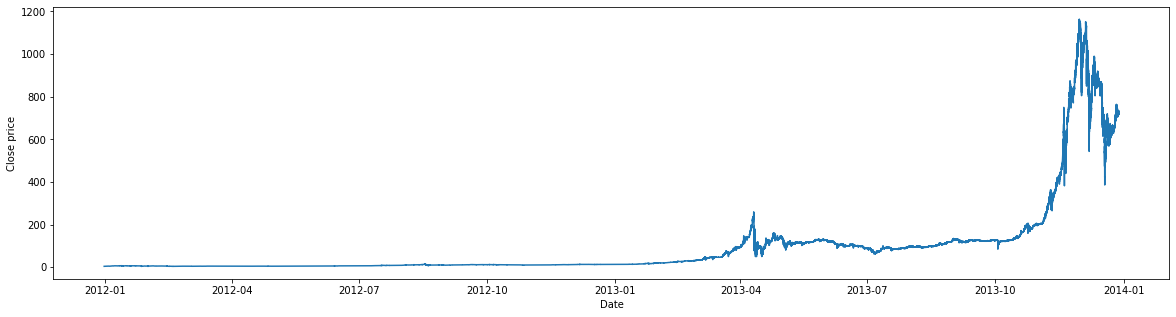

The shape of Training Data is:  (307952,)
The shape of Testing Data is:  (34217,)
0        2.932824
1        2.932824
2        2.929842
3        2.929842
4        2.929438
           ...   
34212    1.858998
34213    1.844865
34214    1.844129
34215    1.846300
34216    1.856973
Name: Close, Length: 34217, dtype: float64
X_train shape is: (307945, 7)
y_train shape is: (307945,)
X_test shape is: (34210, 7)
y_test shape is: (34210,)
Epoch 1/3
9624/9624 [==============================] - 44s 4ms/step - loss: 0.0021
Epoch 2/3
9624/9624 [==============================] - 43s 4ms/step - loss: 5.2931e-05
Epoch 3/3
1070/1070 [==============================] - 2s 2ms/step - loss: 1.9927e-04
RMSE on test set is 0.014


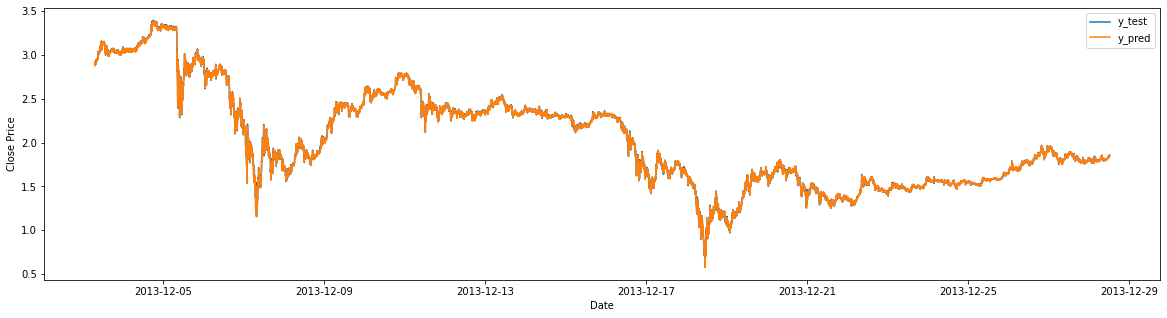

RMSE between y_pred and y is 0.014
Mean Absolute Error between y_pred and y is 0.009
R2_Score between y_pred and y is 0.999


In [ ]:
#Load, Preprocess, Split, Reshape
dataset = load_clean_dataset()
dataset = timestamp_to_date(dataset)
plot(dataset)
dataset = normalise(dataset)
train, test = split_train_test(dataset)
X_train, y_train = prepare_data(train, 'train')
X_test, y_test = prepare_data(test, 'test') 
X_train = reshape(X_train)
X_test = reshape(X_test)

#Design LSTM Model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(7, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=3, verbose=1)

#Evaluate Model
mse = model.evaluate(X_test, y_test)
rmse_test = np.sqrt(mse)
print("RMSE on test set is {}".format(round(rmse_test, 3)))

#Predict y_pred, Plot results and Evaluate Loss metrics:
y_pred = model.predict(X_test)
plot_ypred(dataset, len(train), y_test, y_pred)
loss_metrics(y_test, y_pred)